In [2]:
import matplotlib.pyplot as plt
import json

In [17]:
with open('data/true_deepseek.json') as file:
    true_deepseek = json.load(file)
with open('data/fake_deepseek.json') as file:
    fake_deepseek = json.load(file)

In [18]:
tt, tf, tn, te = (0, 0, 0, 0)
for ts in true_deepseek:
    if ts['label'] == 'true':
        tt += 1
    elif ts['label'] == 'fake':
        tf += 1
    elif ts['label'] == 'NA':
        tn += 1
    else:
        te += 1
ft, ff, fn, fe = (0, 0, 0, 0)
for fs in fake_deepseek:
    if fs['label'] == 'true':
        ft += 1
    elif fs['label'] == 'fake':
        ff += 1
    elif fs['label'] == 'NA':
        fn += 1
    else:
        fe += 1

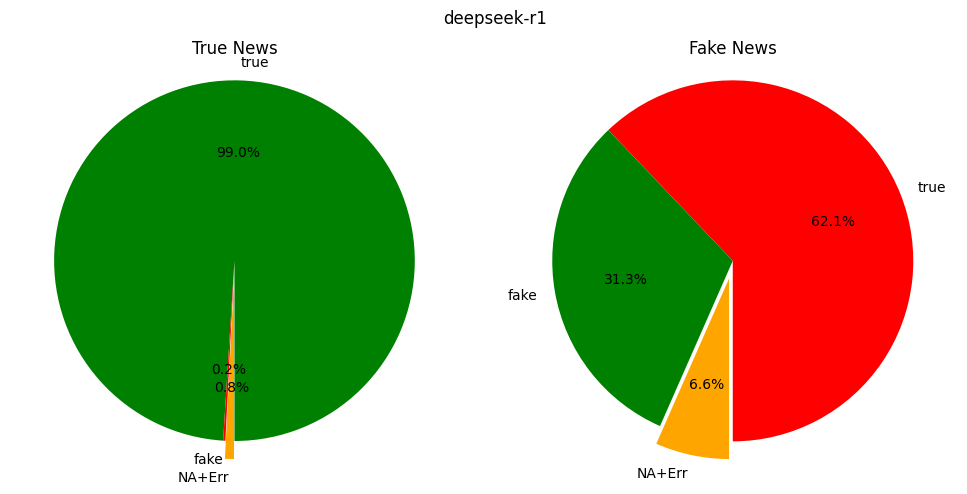

In [19]:
label = ['true', 'fake', 'NA+Err']
slice_colors_true = ['green', 'red', 'orange']
slice_colors_fake = ['red', 'green', 'orange']
explode = [0.0, 0.0, 0.1]
true_News = [tt, tf, tn+te]
fake_news = [ft, ff, fn+fe]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(true_News, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_true)
ax1.set_title('True News')
ax1.axis('equal')  

ax2.pie(fake_news, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_fake)
ax2.set_title('Fake News')
ax2.axis('equal')  

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('deepseek-r1')
plt.show()

In [20]:
precision = ff/(ff+tf)
recall = ff/(ff+ft)
print(f"Completion Rate: {(tt+tf+ff+ft)/2000} Accuracy: {(tt+ff)/(tt+ff+tf+ft)} Precision: {precision} Recall: {recall} F-score: {2*(precision*recall)/(precision+recall)}")

Completion Rate: 0.963 Accuracy: 0.6765316718587746 Precision: 0.9936507936507937 Recall: 0.3351177730192719 F-score: 0.5012009607686149


In [21]:
with open('data/true_llama.json') as file:
    true_llama = json.load(file)
with open('data/fake_llama.json') as file:
    fake_llama = json.load(file)

In [22]:
tt, tf, tn, te = (0, 0, 0, 0)
for ts in true_llama:
    if ts['label'] == 'true':
        tt += 1
    elif ts['label'] == 'fake':
        tf += 1
    elif ts['label'] == 'NA':
        tn += 1
    else:
        te += 1
ft, ff, fn, fe = (0, 0, 0, 0)
for fs in fake_llama:
    if fs['label'] == 'true':
        ft += 1
    elif fs['label'] == 'fake':
        ff += 1
    elif fs['label'] == 'NA':
        fn += 1
    else:
        fe += 1

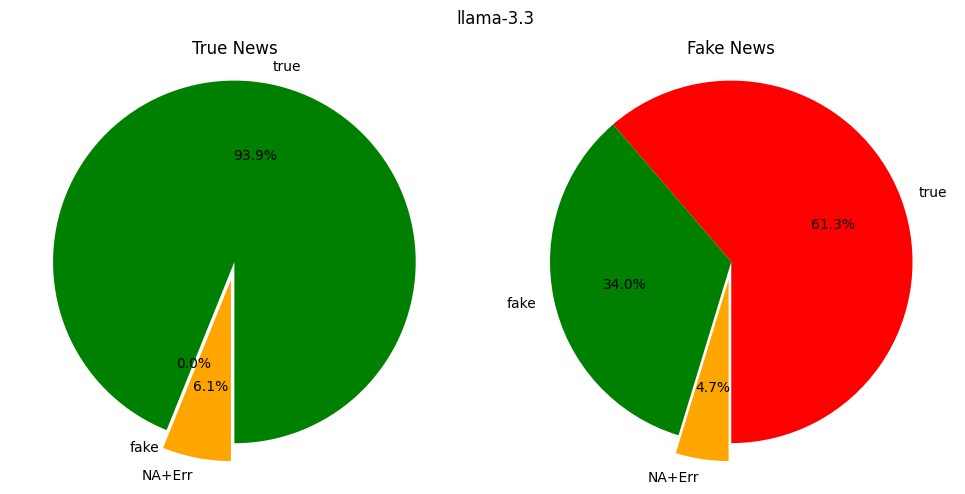

In [23]:
true_News = [tt, tf, tn+te]
fake_news = [ft, ff, fn+fe]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(true_News, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_true)
ax1.set_title('True News')
ax1.axis('equal')  

ax2.pie(fake_news, labels=label, autopct='%1.1f%%', startangle=270, explode = explode, colors=slice_colors_fake)
ax2.set_title('Fake News')
ax2.axis('equal')  

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('llama-3.3')
plt.show()

In [24]:
precision = ff/(ff+tf)
recall = ff/(ff+ft)
print(f"Completion Rate: {(tt+tf+ff+ft)/2000} Accuracy: {(tt+ff)/(tt+ff+tf+ft)} Precision: {precision} Recall: {recall} F-score: {2*(precision*recall)/(precision+recall)}")

Completion Rate: 0.946 Accuracy: 0.6760042283298098 Precision: 1.0 Recall: 0.3567681007345226 F-score: 0.525908739365816


In [26]:
import pprint
for sample in true_deepseek:
    if sample['label'] == 'NA' or sample['label'] == 'Err' or sample['label'] == 'fake':
        pprint.pprint(sample)

{'date': 'December 11, 2017 ',
 'id': 12610,
 'label': 'Err',
 'reason': "Analysis failed: Error code: 400 - {'error': {'message': 'Content "
           "Exists Risk', 'type': 'invalid_request_error', 'param': None, "
           "'code': 'invalid_request_error'}}",
 'subject': 'worldnews',
 'text': 'BEIJING (Reuters) - China s prosecutor began on Monday formal legal '
         'proceedings against disgraced senior politician Sun Zhengcai, once '
         'considered a contender for top leadership, who has been accused of '
         'corruption and other crimes. Sun was abruptly removed from his post '
         'as party chief of the southwestern metropolis of Chongqing - one of '
         'China s most important cities - in July and replaced by Chen Miner, '
         'who is close to President Xi Jinping.  Later that month, he was put '
         'under investigation and in September, the party announced he would '
         'be prosecuted for corruption. Sun was accused of leaking secre

In [28]:
for sample in fake_deepseek:
    if sample['label'] == 'NA' or sample['label'] == 'Err':
        pprint.pprint(sample)

{'date': 'September 11, 2016',
 'id': 23268,
 'label': 'NA',
 'reason': 'The article describes a scheduled radio episode featuring '
           'discussions and opinions on historical and geopolitical events. It '
           'does not make verifiable factual claims but rather promotes '
           'upcoming content, which falls outside the scope of fact-checking '
           'for truth or falsity.',
 'subject': 'Middle-east',
 'text': 'Episode #152 of SUNDAY WIRE SHOW resumes this Sunday September 11, '
         '2016 as host Patrick Henningsen broadcasts a 4 HOUR SPECIAL of LIVE '
         'power-packed talk radio on ACR LISTEN LIVE ON THIS PAGE AT THE '
         'FOLLOWING SCHEDULED SHOW TIMES:SUNDAYS   5pm-8pm UK Time | 12pm-3pm '
         'ET (US) | 9am-12pm PT (US)This week s edition of THE SUNDAY WIRE is '
         'on the road broadcasting LIVE from the Valley of the Sun. This week '
         'host Patrick Henningsen covers this week s top stories '
         'internationally, in

In [29]:
for sample in true_llama:
    if sample['label'] == 'NA' or sample['label'] == 'Err':
        pprint.pprint(sample)

{'date': 'August 12, 2017 ',
 'id': 2210,
 'label': 'Err',
 'reason': 'Analysis failed: Invalid json output: Cut-m Knowledge, Date: '
           'August 3, 2017, 1, North Korea, the "NA\'\n'
           'For troubleshooting, visit: '
           'https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE ',
 'subject': 'politicsNews',
 'text': 'SEOUL (Reuters) - North Korea said on Saturday that nearly 3.5 '
         'million workers, party members and soldiers volunteered to join or '
         'rejoin its army to resist new U.N. sanctions and to fight against '
         'the United States in the current geopolitical tension between '
         'Pyongyang and Washington.  Rodong Sinmun, North Korea’s official '
         'newspaper, said the volunteers had offered to join or rejoin the '
         'People’s Army after the Korea Central News Agency (KCNA) issued a '
         'statement on Monday condemning new sanctions imposed by the United '
         'Nations  in retal

In [31]:
for sample in fake_llama:
    if sample['label'] == 'NA' or sample['label'] == 'Err':
        pprint.pprint(sample)

{'date': 'November 8, 2016',
 'id': 3887,
 'label': 'Err',
 'reason': "Analysis failed: Error code: 429 - {'error': {'message': 'Rate "
           'limit reached for model `llama-3.3-70b-versatile` in organization '
           '`org_01jp12cn8yfbmagp06d8fp23an` service tier `on_demand` on '
           'tokens per minute (TPM): Limit 250000, Used 249359, Requested 931. '
           'Please try again in 69.48ms. Need more tokens? Visit '
           "https://groq.com/self-serve-support/ to request higher limits.', "
           "'type': 'tokens', 'code': 'rate_limit_exceeded'}}",
 'subject': 'News',
 'text': 'Donald Trump showed up to vote in New York City with his wife '
         'Melania and hilarity ensued.When the Trump s walked through the '
         'doors they were greeted by a round of boos and jeers. Clearly, New '
         'York voters are not Trump fans.But Trump s day got even worse when '
         'he tried to sneak a peek at Melania s ballot, apparently just making '
         